<a href="https://colab.research.google.com/github/AabisZ/Deep-Learning/blob/main/Reuters_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow --upgrade

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models,layers,optimizers,utils
import numpy as np
import matplotlib.pyplot as plt


# Multi class classification model 
means more than one class like in MNISt fashtion dataset

Loading dataset

In [3]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
print(len(train_data))
print(len(test_data))

8982
2246


In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

Preparing data

In [12]:
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

In [9]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [13]:
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i ,label in enumerate(labels):
    results[i,label]= 1.
  return results

In [14]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)


# OR 
we can do the above one hot by a builtin function instead of writing the function by ourself

In [15]:
one_hot_train_labels=utils.to_categorical(train_labels)
one_hot_test_labels=utils.to_categorical(test_labels)

Now applying cross validation

In [16]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [17]:
# building network

In [21]:
model =models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape= (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
#first nd second layer output is 64
#last layer out is 46 because the classes are 46 in MNIST dataset the classes were 10

# compile the model

loss='categorical_crossentropy' loss func is used for multi class classifctaion
when there are 2 classes i.e binary classes then we use binary_crossentropy

In [22]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
history=model.fit(partial_x_train,
                  partial_y_train,epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 76ms/step - loss: 2.7543 - acc: 0.5234 - val_loss: 1.7840 - val_acc: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4143 - acc: 0.7172 - val_loss: 1.2794 - val_acc: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0079 - acc: 0.7937 - val_loss: 1.1235 - val_acc: 0.7590
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.7907 - acc: 0.8356 - val_loss: 1.0351 - val_acc: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6280 - acc: 0.8708 - val_loss: 0.9785 - val_acc: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5002 - acc: 0.8995 - val_loss: 0.9501 - val_acc: 0.7990
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4099 - acc: 0.9154 - val_loss: 0.8998 - val_acc: 0.8130
Epoch 8/20
16/16 [==============================] - 1s 51ms/step - loss: 0.3314 - a

accuracy 95 % and 80% acc on unseen data

# Visl Loss

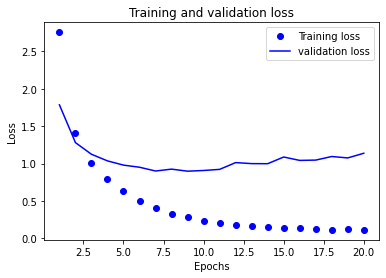

In [24]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values) + 1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# visl accuracy

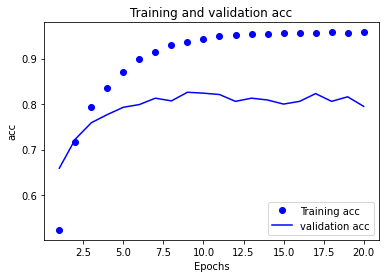

In [26]:
plt.clf()
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
epochs=range(1,len(acc_values) + 1)
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [27]:
predictions=model.predict(x_test)

In [29]:
predictions.shape

(2246, 46)

In [30]:
predictions[1].sum()

1.0000001

In [31]:
predictions

array([[1.0759234e-06, 6.0822931e-06, 1.2107030e-08, ..., 3.4064826e-08,
        4.7339066e-09, 4.0447816e-08],
       [1.8379308e-03, 1.5791119e-03, 4.6123398e-05, ..., 3.3233889e-07,
        6.9850435e-13, 3.9767624e-06],
       [6.7211203e-02, 6.9360787e-01, 2.9432711e-03, ..., 5.8786289e-05,
        1.2109061e-04, 1.9932080e-03],
       ...,
       [8.2052600e-07, 1.7864371e-05, 2.1264920e-07, ..., 9.1011536e-08,
        3.2091103e-07, 2.3084979e-06],
       [1.1325072e-03, 2.0689540e-02, 2.2889038e-03, ..., 1.9542756e-03,
        3.2684209e-06, 3.2804690e-03],
       [4.7652852e-03, 6.5098363e-01, 8.0167822e-04, ..., 9.9381205e-06,
        5.5334891e-07, 4.6022786e-04]], dtype=float32)

In [34]:
predictions[0].argmax() #numpy func returns largest val

3

# Alternate approach for labels instead of one hot encoding

In [35]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [36]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )
history=model.fit(x_train,y_train,epochs=20,batch_size=512)

Epoch 1/20
18/18 [==============================] - 1s 46ms/step - loss: 0.2402 - acc: 0.9387
Epoch 2/20
18/18 [==============================] - 1s 46ms/step - loss: 0.1653 - acc: 0.9483
Epoch 3/20
18/18 [==============================] - 1s 47ms/step - loss: 0.1435 - acc: 0.9503
Epoch 4/20
18/18 [==============================] - 1s 46ms/step - loss: 0.1305 - acc: 0.9545
Epoch 5/20
18/18 [==============================] - 1s 45ms/step - loss: 0.1234 - acc: 0.9548
Epoch 6/20
18/18 [==============================] - 1s 44ms/step - loss: 0.1203 - acc: 0.9535
Epoch 7/20
18/18 [==============================] - 1s 45ms/step - loss: 0.1152 - acc: 0.9568
Epoch 8/20
18/18 [==============================] - 1s 45ms/step - loss: 0.1130 - acc: 0.9546
Epoch 9/20
18/18 [==============================] - 1s 45ms/step - loss: 0.1089 - acc: 0.9556
Epoch 10/20
18/18 [==============================] - 1s 45ms/step - loss: 0.1099 - acc: 0.9548
Epoch 11/20
18/18 [==============================] - 1s 44m

In [37]:
predictions=model.predict(x_test)

In [38]:
predictions.shape

(2246, 46)

In [40]:
predictions[0].sum()

1.0